## Import the required libraries for Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [4]:
pwd

'C:\\Users\\om\\Documents'

In [5]:
cd D:\Data Science\Project\P1

D:\Data Science\Project\P1


## Part-1: Data Exploration and Pre-processing 

## 1) Load the given dataset

In [6]:
empdata=pd.read_csv("Python_Linear_Regres.csv")
empdata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
empdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [8]:
empdata.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

## 2) Fill Null value of experience column with the value 0

In [9]:
empdata['experience']=empdata['experience'].fillna('zero')
empdata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [10]:
from word2number import w2n
empdata.experience = empdata.experience.apply(w2n.word_to_num)
empdata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


## 3) Replace the Null values of the column test score with mean value 

In [11]:
import math
mean_testscore=math.floor(empdata['test_score(out of 10)'].mean())
mean_testscore

7

In [12]:
empdata['test_score(out of 10)']=empdata['test_score(out of 10)'].fillna(mean_testscore)
empdata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


## 4) Display a scatter plot between experience and Salary

Text(0.5, 1.0, 'Experience v/s Salary')

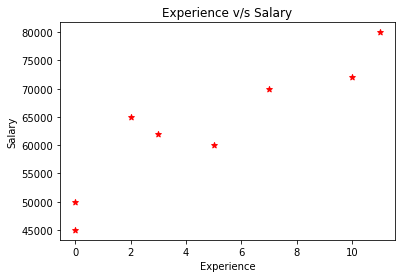

In [13]:
plt.scatter(empdata['experience'],empdata['salary($)'],marker='*',color='r')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title('Experience v/s Salary')

## 5) Display a scatter plot between test score and Salary 

Text(0.5, 1.0, 'Test Score v/s Salary')

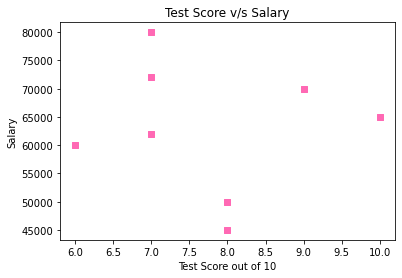

In [14]:
plt.scatter(empdata['test_score(out of 10)'],empdata['salary($)'],marker='s',color='hotpink')
plt.xlabel("Test Score out of 10")
plt.ylabel("Salary")
plt.title('Test Score v/s Salary')

## 6) Display a scatter plot between interview score and Salary

Text(0.5, 1.0, 'Interview Score v/s Salary')

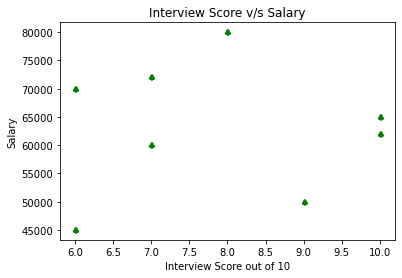

In [15]:
plt.scatter(empdata['interview_score(out of 10)'],empdata['salary($)'],marker=r'$\clubsuit$',color='g')
plt.xlabel("Interview Score out of 10")
plt.ylabel("Salary")
plt.title('Interview Score v/s Salary')

## 7) Display bar plot for experience 

Text(0, 0.5, 'Salary')

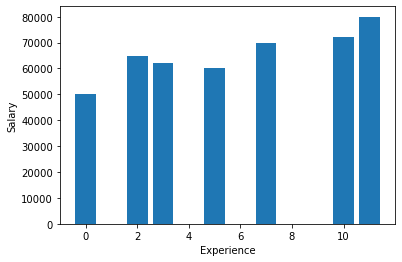

In [16]:
plt.bar(empdata['experience'],empdata['salary($)'])
plt.xlabel("Experience")
plt.ylabel("Salary")

## Part-2: Working with Model

## 1) Separate feature data from target data

In [34]:
featuredata=empdata[['experience','test_score(out of 10)','interview_score(out of 10)']]
featuredata

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [35]:
targetdata=empdata['salary($)']
targetdata

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

## 2) Create a Linear regression model between Features and target data

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(featuredata,targetdata,test_size=0.2,random_state=20)

In [39]:
X_train

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
6,10,7.0,7
4,7,9.0,6
2,5,6.0,7
3,2,10.0,10


In [40]:
X_test

,experience,test_score(out of 10),interview_score(out of 10)
5,3,7.0,10
7,11,7.0,8


In [41]:
Y_train

0    50000
1    45000
6    72000
4    70000
2    60000
3    65000
Name: salary($), dtype: int64

In [42]:
Y_test

5    62000
7    80000
Name: salary($), dtype: int64

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
regression_model=LinearRegression()

In [48]:
regression_model.fit(X_train,Y_train)

LinearRegression()

In [50]:
Predicted_Price=regression_model.predict(X_test)
Predicted_Price

array([59382.88440334, 79017.2596143 ])

## 3) Display the test score and training score 

In [53]:
regression_model.score(X_test,Y_test)

0.9517588104199723

In [56]:
regression_model.score(X_train,Y_train)

0.9697131353647

## 4) Extract slope and intercept value from the model 

In [58]:
print('Slope:' ,regression_model.coef_) 
print('Intercept:', regression_model.intercept_) 

Slope: [2901.1003848  2517.38337946 1787.21393371]
Intercept: 15185.760255631329


## 5) Display Mean Squared Error

In [60]:
mse=mean_squared_error(Y_test,Predicted_Price)
print('Mean squared error: ', mse)

Mean squared error:  3907536.3559822435


## 6) Display Mean Absolute Error 

In [62]:
mae=mean_absolute_error(Y_test,Predicted_Price)
print('Mean Absolute error: ', mae)

Mean Absolute error:  1799.92799117892


## 7) Display Root mean Squared error 

In [64]:
rmse=math.sqrt(mse)
print('Mean Root squared error: ', rmse)

Mean Root squared error:  1976.7489360012928


## 8) Display R2 score

In [61]:
r2 = r2_score(Y_test,Predicted_Price)
print('R2 score: ', r2)

R2 score:  0.9517588104199723
